<h1> DataScientist Employment </h1>



About this Dataset
Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# Ensure system is above 3.5 
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [67]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns
import urllib.request
from sklearn.metrics import roc_auc_score, precision_score, recall_score


In [31]:
# Import for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
# Download the Friday sale EDA dataset from Kaggle

DataScience = pd.read_csv("datascience.csv")


In [7]:
# Display the basic informations of the dataset
DataScience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


*There are 11 attributes, with no missing attributes*


In [8]:
DataScience.isnull().sum()   # display the total number of null value in each columns

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

*There are no null or missing values*

<h1>Dataset Pre-Processing </h2>

In [9]:
DataScience['experience_level']=DataScience['experience_level'].map({'EX':3,'EN':2,'SE':1,'MI':0})  # covert the gender to categorical for processing

# Data Structure

In [10]:
DataScience["experience_level"].value_counts()

1    280
0    213
2     88
3     26
Name: experience_level, dtype: int64

In [11]:
DataScience["employee_residence"].value_counts()

US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
PT      6
BR      6
PK      6
NL      5
PL      4
IT      4
RU      4
AE      3
AT      3
VN      3
TR      3
AU      3
RO      2
BE      2
SG      2
SI      2
DK      2
HU      2
NG      2
MX      2
BO      1
MY      1
TN      1
IE      1
DZ      1
AR      1
CZ      1
JE      1
LU      1
PR      1
RS      1
EE      1
CL      1
HK      1
KE      1
MD      1
CO      1
IR      1
CN      1
MT      1
UA      1
IQ      1
HN      1
BG      1
HR      1
PH      1
NZ      1
CH      1
Name: employee_residence, dtype: int64

In [38]:
Experience_EN=DataScience["experience_level"]==1
DataScience["Experience"]=Experience_EN
DataScience.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,0,2020,0,2,22,70000,7,79833,14,0,12,0,False
1,1,2020,1,2,41,260000,16,260000,32,0,29,2,True
2,2,2020,1,2,7,85000,8,109024,20,50,18,1,True
3,3,2020,0,2,47,20000,16,20000,23,0,20,2,False
4,4,2020,1,2,38,150000,16,150000,55,50,48,0,True


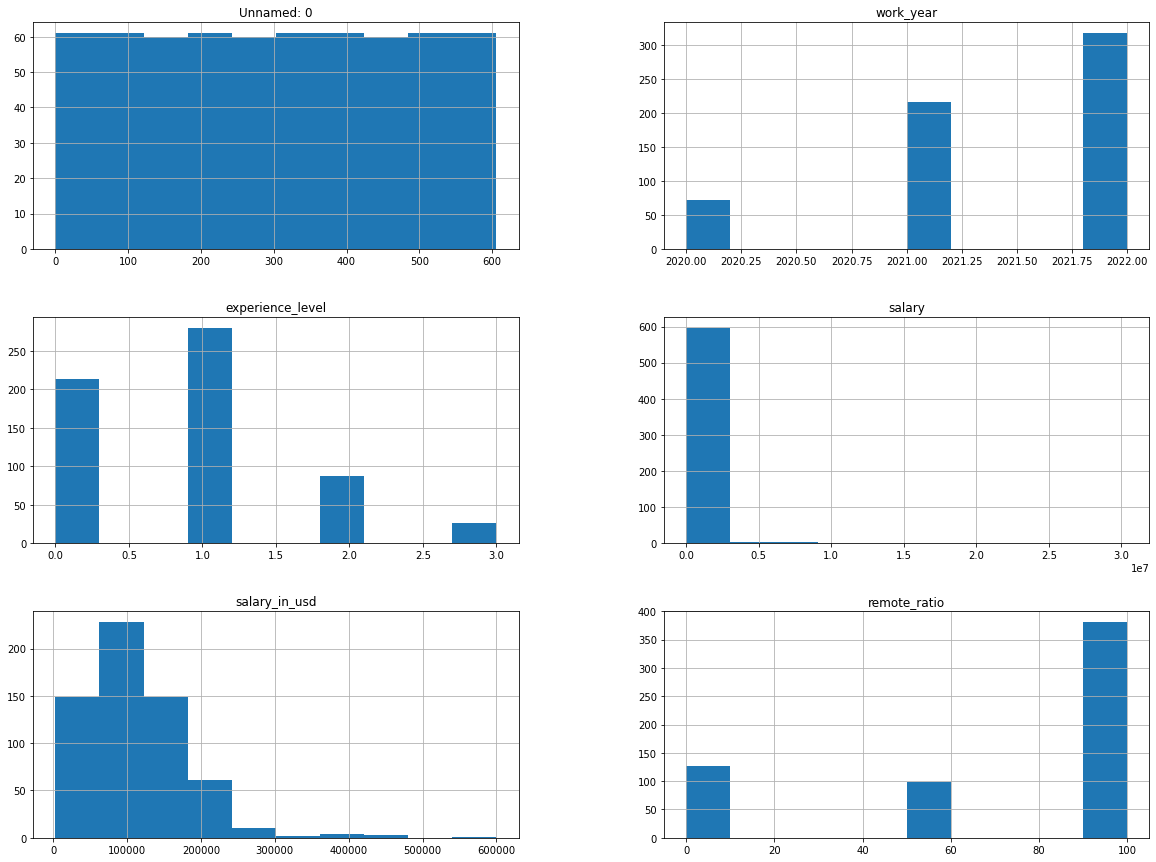

In [41]:
DataScience.hist(bins=10, figsize=(20,15))
plt.show()

*Based on these histograms, it seems as though, there is a surplus of a specific item in Product_Category_3 whilst the rest of the items are not as plentiful. Product_Category_1 and Product_Category_2 do not seem to show this general pattern.*

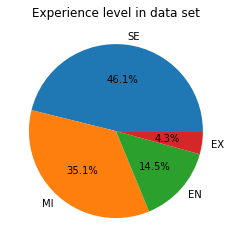

In [42]:
labels=['SE','MI','EN','EX']
plt.pie(DataScience.experience_level.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Experience level in data set')
plt.show()

*Male show a higher percentage than female*

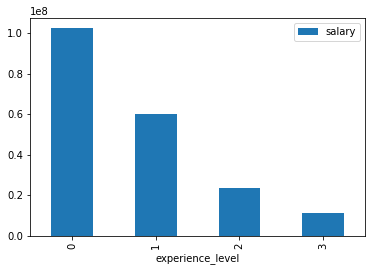

In [43]:
#create a graph with age and total purchase of each age group

DataScience.groupby('experience_level')['salary'].sum().plot(kind='bar')
plt.legend()

In [12]:
import seaborn as sn
from matplotlib import pyplot as plt



C:\Users\gedoz\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


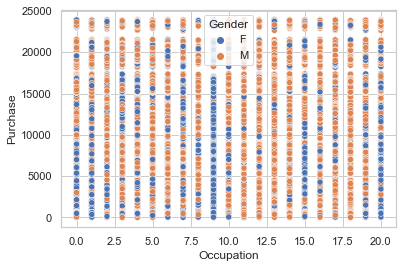

In [13]:
sn.scatterplot(x = 'Occupation', y= 'Purchase', data = BlackFridaySale , hue= 'Gender')
plt.show()

In [39]:
DataScience.drop(['experience_level'],axis=1)

,Unnamed: 0,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Experience
0,0,2020,2,22,70000,7,79833,14,0,12,0,False
1,1,2020,2,41,260000,16,260000,32,0,29,2,True
2,2,2020,2,7,85000,8,109024,20,50,18,1,True
3,3,2020,2,47,20000,16,20000,23,0,20,2,False
4,4,2020,2,38,150000,16,150000,55,50,48,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,2,17,154000,16,154000,55,100,48,1,True
603,603,2022,2,17,126000,16,126000,55,100,48,1,True
604,604,2022,2,12,129000,16,129000,55,0,48,1,True
605,605,2022,2,12,150000,16,150000,55,100,48,1,True


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
DataScience['Experience']=le.fit_transform(DataScience['Experience'])
DataScience['employment_type']=le.fit_transform(DataScience['employment_type'])
DataScience['job_title']=le.fit_transform(DataScience['job_title'])
DataScience['salary_currency']=le.fit_transform(DataScience['salary_currency'])
DataScience['employee_residence']=le.fit_transform(DataScience['employee_residence'])
DataScience['company_location']=le.fit_transform(DataScience['company_location'])
DataScience['company_size']=le.fit_transform(DataScience['company_size'])

# Correlations

In [49]:
#how what is the highest relations to purchase 
corr_matrix=DataScience.corr()
corr_matrix['experience_level'].sort_values(ascending=False)  

experience_level      1.000000
salary_in_usd         0.150924
salary_currency       0.115212
employee_residence    0.092450
remote_ratio          0.091606
company_size          0.084779
company_location      0.057769
employment_type       0.004473
job_title            -0.005490
work_year            -0.018915
Unnamed: 0           -0.031257
salary               -0.043905
Name: experience_level, dtype: float64

*According to the correlation, product_category_3 has a mild positive correlation with purchase, there also seems to be a mild negative correlation with product_category_1*

In [50]:
corr_matrix["work_year"].sort_values(ascending=False)

work_year             1.000000
Unnamed: 0            0.886550
salary_currency       0.202420
employee_residence    0.193552
company_location      0.181515
salary_in_usd         0.170493
company_size          0.078764
remote_ratio          0.076314
employment_type       0.016323
experience_level     -0.018915
salary               -0.087577
job_title            -0.162560
Name: work_year, dtype: float64

In [51]:
print(DataScience.corr())

                    Unnamed: 0  work_year  experience_level  employment_type  \
Unnamed: 0            1.000000   0.886550         -0.031257         0.001431   
work_year             0.886550   1.000000         -0.018915         0.016323   
experience_level     -0.031257  -0.018915          1.000000         0.004473   
employment_type       0.001431   0.016323          0.004473         1.000000   
job_title            -0.140975  -0.162560         -0.005490        -0.101823   
salary               -0.096250  -0.087577         -0.043905         0.000536   
salary_currency       0.191409   0.202420          0.115212        -0.087365   
salary_in_usd         0.167025   0.170493          0.150924        -0.123545   
employee_residence    0.183887   0.193552          0.092450        -0.109979   
remote_ratio          0.095000   0.076314          0.091606        -0.045592   
company_location      0.162139   0.181515          0.057769        -0.083661   
company_size          0.090137   0.07876

In [52]:
corr_matrix["job_title"].sort_values(ascending=False)

job_title             1.000000
salary_in_usd         0.131016
salary                0.027710
experience_level     -0.005490
company_size         -0.031011
remote_ratio         -0.058589
employment_type      -0.101823
employee_residence   -0.119135
Unnamed: 0           -0.140975
company_location     -0.147379
salary_currency      -0.149591
work_year            -0.162560
Name: job_title, dtype: float64

In [53]:
corr_matrix["company_location"].sort_values(ascending=False)

company_location      1.000000
employee_residence    0.897704
salary_currency       0.787084
salary_in_usd         0.428994
work_year             0.181515
remote_ratio          0.169083
Unnamed: 0            0.162139
experience_level      0.057769
company_size         -0.066554
salary               -0.082894
employment_type      -0.083661
job_title            -0.147379
Name: company_location, dtype: float64

In [54]:
corr_matrix["experience_level"].sort_values(ascending=False)

experience_level      1.000000
salary_in_usd         0.150924
salary_currency       0.115212
employee_residence    0.092450
remote_ratio          0.091606
company_size          0.084779
company_location      0.057769
employment_type       0.004473
job_title            -0.005490
work_year            -0.018915
Unnamed: 0           -0.031257
salary               -0.043905
Name: experience_level, dtype: float64

In [61]:
ds1=DataScience[["salary_in_usd","salary_currency","employee_residence","remote_ratio","company_size","company_location"]]
ds2=DataScience[["salary_currency","employee_residence","company_location","salary_in_usd","company_size"]]
ds3=DataScience[["employee_residence","salary_currency","salary_in_usd"]]

In [55]:
## experience level, work year, company location

In [56]:
DataScience.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,0,2,22,70000,7,79833,14,0,12,0
1,1,2020,1,2,41,260000,16,260000,32,0,29,2
2,2,2020,1,2,7,85000,8,109024,20,50,18,1
3,3,2020,0,2,47,20000,16,20000,23,0,20,2
4,4,2020,1,2,38,150000,16,150000,55,50,48,0


In [58]:
DataScience.drop(columns=DataScience.columns[0],axis=1,inplace=True)

In [59]:
DataScience.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,0,2,22,70000,7,79833,14,0,12,0
1,2020,1,2,41,260000,16,260000,32,0,29,2
2,2020,1,2,7,85000,8,109024,20,50,18,1
3,2020,0,2,47,20000,16,20000,23,0,20,2
4,2020,1,2,38,150000,16,150000,55,50,48,0


# 3 new datasets

In [63]:
ds1=DataScience[["salary_in_usd","salary_currency","employee_residence","remote_ratio","company_size","company_location"]]
ds2=DataScience[["salary_currency","employee_residence","company_location","salary_in_usd","company_size"]]
ds3=DataScience[["employee_residence","salary_currency","salary_in_usd"]]

# KNeighbors Classifier

In [77]:
##split data into training and testing, 75% training and 25% test

In [42]:
import sklearn
from sklearn.model_selection import train_test_split
y=DataScience['Experience']
X=DataScience[['employment_type','salary_currency']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

## ROC Curve

In [44]:
## https://stackabuse.com/understanding-roc-curves-with-python/

In [60]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    

In [46]:
from sklearn.neighbors import KNeighborsClassifier
probs= knn.predict_proba(X_test)
probs = probs[:,1]

In [47]:
## understanding why i kept getting the multivalue error https://stackoverflow.com/questions/61114520/how-to-fix-valueerror-multiclass-format-is-not-supported
##apparently adding a label of 1 fixes all your problem lol 

In [48]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

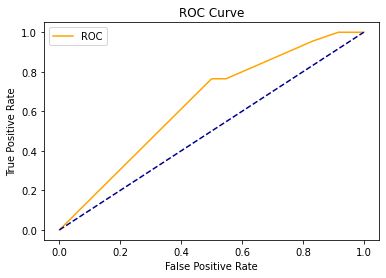

In [49]:
plot_roc_curve(fpr,tpr)

## Confusion Matrix

In [50]:
y_actual = pd.Series(y_test,name='actual')
y_predicted=pd.Series(y_pred,name='predicted')
print(pd.crosstab(y_actual,y_predicted))
#from sklearn import metrics
#c_matrix = metrics.confusion_matrix(y_test,y_pred)
#print(c_matrix)

predicted   0   1
actual           
0          10  22
1           7   6


In [54]:
#import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix

#color = 'white'
#matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
#matrix.ax_.set_title('Confusion Matrix', color=color)
#plt.xlabel('Predicted Label', color=color)
#plt.ylabel('True Label', color=color)
#plt.gcf().axes[0].tick_params(colors=color)
#plt.gcf().axes[1].tick_params(colors=color)
# figure(figsize=(10,10), dpi=80)
#plt.show()

In [ ]:
#understanding confusion matrix: https://python.plainenglish.io/how-to-read-and-interpret-sklearns-confusion-matrix-and-plot-confusion-matrix-functions-27b0ab7f00c1

<AxesSubplot:>

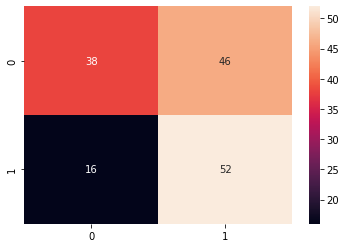

In [52]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55        84
           1       0.53      0.76      0.63        68

    accuracy                           0.59       152
   macro avg       0.62      0.61      0.59       152
weighted avg       0.63      0.59      0.58       152



In [119]:
cm = confusion_matrix(y_test, y_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]
print('tp', 'fp', 'fn', 'tn')
print(tp, fp, fn, tn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(y_pred, y_test))
print('recall = ', recall_score(y_pred, y_test))
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

tp fp fn tn
38 46 16 52
sensitivity = 0.7037037037037037
specificity = 0.5306122448979592
precision = 0.7647058823529411
recall =  0.5306122448979592
AUC: 0.609


## Cross Validation

In [28]:
## https://machinelearningknowledge.ai/cross-validation-in-sklearn-hold-out-approach-k-fold-cross-validation-loocv/

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(10)
result=cross_val_score(knn,X,y,cv=kfold_validation)
print(result)
print(np.mean(result))

[0.75409836 0.75409836 0.68852459 0.86885246 0.7704918  0.98360656
 0.98360656 0.86666667 0.81666667 0.96666667]
0.8453278688524589


## Gaussian NB

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
#gprobability= nb.predict_proba(X_test)
gprobability= nb.predict(X_test)
print("nb score accurate:",nb.score(X_test,y_test))


nb score accurate: 0.5789473684210527


<AxesSubplot:>

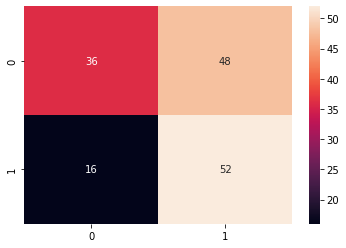

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,gprobability),annot=True)

In [62]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [63]:
from sklearn.naive_bayes import GaussianNB
probs= nb.predict_proba(X_test)
probs = probs[:,1]

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

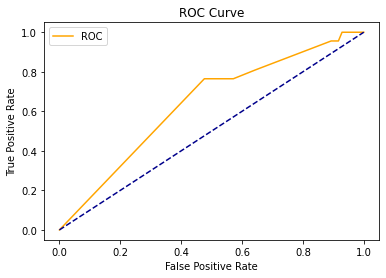

In [65]:
plot_roc_curve(fpr,tpr)

In [120]:
cm = confusion_matrix(y_test, gprobability)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(gprobability, y_test))
print('recall = ', recall_score(gprobability, y_test))
auc = roc_auc_score(y_test, gprobability)
print('AUC: %.3f' % auc)

tp fp tn fn
36 48 52 16
sensitivity = 0.6923076923076923
specificity = 0.52
precision = 0.7647058823529411
recall =  0.52
AUC: 0.597


## Multinomial NB

In [77]:
from sklearn.naive_bayes import MultinomialNB
multi = MultinomialNB()
multi.fit(X,y)
#gprobability= nb.predict_proba(X_test)
mnb= multi.predict(X_test)
print("nb score accurate:",multi.score(X_test,y_test))

nb score accurate: 0.5328947368421053


<AxesSubplot:>

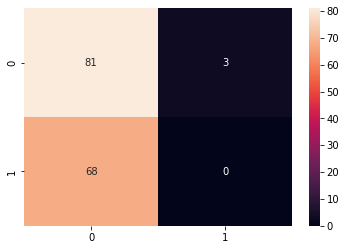

In [78]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,mnb),annot=True)

In [79]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [107]:
from sklearn.naive_bayes import MultinomialNB
mprobs= multi.predict_proba(X_test)
mnprobs = mprobs[:,1]

In [110]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,mnprobs,pos_label=1)

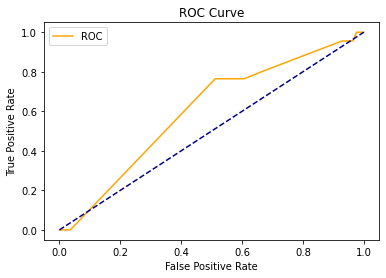

In [111]:
plot_roc_curve(fpr,tpr)

In [121]:
cm = confusion_matrix(y_test, mnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(mnb, y_test))
print('recall = ', recall_score(mnb, y_test))
auc = roc_auc_score(y_test, mnb)
print('AUC: %.3f' % auc)

tp fp tn fn
81 3 0 68
sensitivity = 0.5436241610738255
specificity = 0.0
precision = 0.0
recall =  0.0
AUC: 0.482


## Complement NB

In [84]:
from sklearn.naive_bayes import ComplementNB
comp = ComplementNB()
comp.fit(X,y)
#gprobability= nb.predict_proba(X_test)
cnb= comp.predict(X_test)
print("nb score accurate:",comp.score(X_test,y_test))

nb score accurate: 0.5986842105263158


<AxesSubplot:>

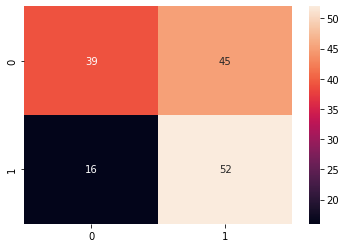

In [85]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,cnb),annot=True)

In [112]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [113]:
from sklearn.naive_bayes import ComplementNB
probs= comp.predict_proba(X_test)
probs = probs[:,1]

In [114]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

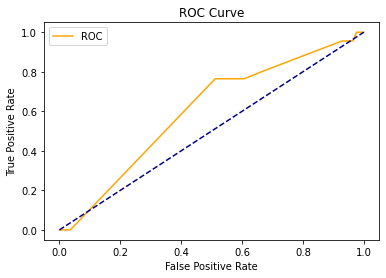

In [115]:
plot_roc_curve(fpr,tpr)

In [122]:
cm = confusion_matrix(y_test, cnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(cnb, y_test))
print('recall = ', recall_score(cnb, y_test))
auc = roc_auc_score(y_test, cnb)
print('AUC: %.3f' % auc)

tp fp tn fn
39 45 52 16
sensitivity = 0.7090909090909091
specificity = 0.5360824742268041
precision = 0.7647058823529411
recall =  0.5360824742268041
AUC: 0.614


## Bernoulli NB

In [117]:
from sklearn.naive_bayes import BernoulliNB
berny = BernoulliNB()
berny.fit(X,y)
#gprobability= nb.predict_proba(X_test)
bnb= berny.predict(X_test)
print("nb score accurate:",berny.score(X_test,y_test))

nb score accurate: 0.5526315789473685


<AxesSubplot:>

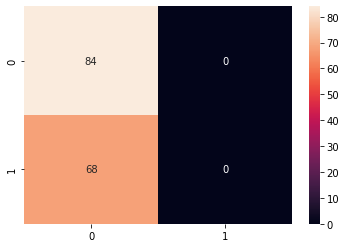

In [98]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,bnb),annot=True)

In [127]:
from sklearn.naive_bayes import BernoulliNB
probs= berny.predict_proba(X_test)
probs = probs[:,1]

In [128]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

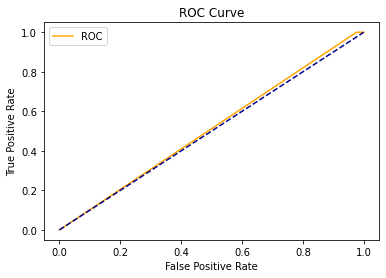

In [129]:
plot_roc_curve(fpr,tpr)

In [123]:
cm = confusion_matrix(y_test, bnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(bnb, y_test))
print('recall = ', recall_score(bnb, y_test))
auc = roc_auc_score(y_test, bnb)
print('AUC: %.3f' % auc)

tp fp tn fn
84 0 0 68
sensitivity = 0.5526315789473685
specificity = nan
precision = 0.0
recall =  0.0
AUC: 0.500


C:\Users\gedoz\AppData\Local\Temp\ipykernel_42412\2768461983.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  print('specificity =' ,(tn / (tn+fp)))
C:\Users\gedoz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Categorical NB

In [125]:
from sklearn.naive_bayes import CategoricalNB
cate = CategoricalNB()
cate.fit(X,y)
#gprobability= nb.predict_proba(X_test)
ccnb= cate.predict(X_test)
print("nb score accurate:",cate.score(X_test,y_test))

nb score accurate: 0.625


<AxesSubplot:>

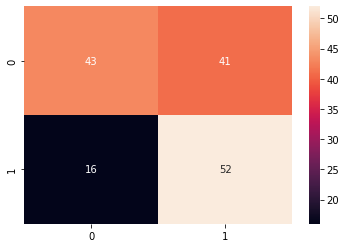

In [126]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,ccnb),annot=True)

In [130]:
from sklearn.naive_bayes import CategoricalNB
probs= cate.predict_proba(X_test)
probs = probs[:,1]

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,probs,pos_label=1)

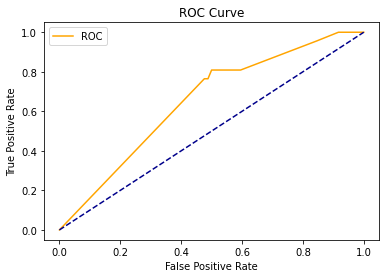

In [132]:
plot_roc_curve(fpr,tpr)

In [134]:
cm = confusion_matrix(y_test, ccnb)
tp, fp, tn, fn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(ccnb, y_test))
print('recall = ', recall_score(ccnb, y_test))
auc = roc_auc_score(y_test, ccnb)
print('AUC: %.3f' % auc)

tp fp tn fn
43 41 52 16
sensitivity = 0.7288135593220338
specificity = 0.5591397849462365
precision = 0.7647058823529411
recall =  0.5591397849462365
AUC: 0.638


In [135]:
## categorical naive bayes works best for this dataset

## Table

In [137]:
from tabulate import tabulate 
table = [ ["MN Bayes", "81","3","0","68","0.5436","0","0","0","0.482"],["GN Bayes","36","48","52","16","0.69230","0.52","0.7647","0.52","0.597"],
        ["CN Bayes","39","42","52","16","0.70909","0.5360","0.7647","0.5360","0.614"],["BN Bayes","84","0","0","68","0.55263","nan","0","0","0.5"],["CaN Bayes","43","41","52","16","0.72881","0.5591","0.7647","0.5591","0.638"]]
head = ["Name","True Positive","False Positive","True Negative","False Negative","Sensitivity","Specificity","Precision","Recall","AUC"]
print(tabulate(table, headers=head, tablefmt="grid"))

+-----------+-----------------+------------------+-----------------+------------------+---------------+---------------+-------------+----------+-------+
| Name      |   True Positive |   False Positive |   True Negative |   False Negative |   Sensitivity |   Specificity |   Precision |   Recall |   AUC |
+===========+=================+==================+=================+==================+===============+===============+=============+==========+=======+
| MN Bayes  |              81 |                3 |               0 |               68 |       0.5436  |        0      |      0      |   0      | 0.482 |
+-----------+-----------------+------------------+-----------------+------------------+---------------+---------------+-------------+----------+-------+
| GN Bayes  |              36 |               48 |              52 |               16 |       0.6923  |        0.52   |      0.7647 |   0.52   | 0.597 |
+-----------+-----------------+------------------+-----------------+--------------

# Binning

In [14]:
def biningFunction(col,cut_points,labels=None):
    minval = col.min()
    maxval= col.max()
    break_points=[minval]+ cut_points+ [maxval]
    print(break_points)
    if not labels:
        labels=range(len(cut_points)+1)
        colBin= pd.cut(col,bins=break_points,labels=labels,inclde_lowest=True)
        return colBin

In [15]:
cut_points=[17,55];
labels=["Kid","Young","Senior","Super senior"]
BlackFridaySale["exp_category"]= biningFunction(BlackFridaySale["Age"],cut_points,labels)
BlackFridaySale

['0-17', 17, 55, '55+']


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,exp_category
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,None
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,None
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,None
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,None
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368,None
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371,None
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137,None
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365,None


# Data Science Data

In [26]:
print("Keys of data set are",DataScience.keys())

Keys of data set are Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')


In [29]:
 type(DataScience['work_year'])

pandas.core.series.Series

In [30]:
DataScience['work_year'].shape

(607,)